In [1]:
from sklearn.neighbors import LocalOutlierFactor
#!pip install emmv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import matplotlib
import matplotlib.dates as mdates
%matplotlib inline
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import matplotlib.pyplot as plt
from matplotlib import pyplot
#import plotly.graph_objs as go
#init_notebook_mode(connected=True)
import eif as iso
from functions import load_dataset,calc_percent_NAs, adfuller_test,data_load
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, calinski_harabasz_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from emmv import emmv_scores
#!pip install ipympl
%matplotlib widget
from sklearn.metrics import silhouette_score

In [2]:
data = load_dataset("anomaly 3.csv")
data

name,Flow,P_1,P_3,P_4,P_5,T_2,T_3,T_4
Datetime,,,,,,,,
2021-03-11 10:10:00,47020.962524,2.083591,2.207742,1.494308,1.014526,NaN,23.092529,22.924228
2021-03-11 10:10:01,46970.432281,NaN,2.207284,NaN,1.014297,23.006652,23.098698,22.922855
2021-03-11 10:10:02,46931.465149,2.083860,2.207056,1.493851,1.014069,23.012825,23.106237,NaN
2021-03-11 10:10:03,46941.994858,2.084130,2.207513,1.494308,1.014526,23.013511,23.102810,22.915990
2021-03-11 10:10:04,47028.034973,NaN,2.206827,NaN,1.014297,NaN,23.090473,22.912557
...,...,...,...,...,...,...,...,...
2021-03-11 14:59:55,46302.044678,1.978631,NaN,NaN,1.011100,27.887662,27.969157,NaN
2021-03-11 14:59:56,46220.790482,1.977286,2.129547,1.477621,1.010415,27.889034,NaN,27.785660
2021-03-11 14:59:57,46267.901230,1.977016,2.129318,1.477164,NaN,27.888348,27.969842,27.793899


In [3]:
#### Lets see missing values 
missing = calc_percent_NAs(data)
cols = data.columns
index = pd.to_datetime(data.index,utc = True)
##Missing values imputation
lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
data = imp.fit_transform(data)
data = pd.DataFrame(data, columns=cols, index = index)
data

[IterativeImputer] Completing matrix with shape (17198, 8)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.06
[IterativeImputer] Change: 185.21818094469492, scaled tolerance: 47.176522064209 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.11
[IterativeImputer] Change: 613.121087315142, scaled tolerance: 47.176522064209 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.16
[IterativeImputer] Change: 367.57762090566433, scaled tolerance: 47.176522064209 
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.21
[IterativeImputer] Change: 240.76327517534, scaled tolerance: 47.176522064209 
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.25
[IterativeImputer] Change: 127.88478513270789, scaled tolerance: 47.176522064209 
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.31
[IterativeImputer] Change: 58.97193661217366, scaled tolerance: 47.176522064209 
[IterativeImputer] Ending imputation round 7/10, elap

name,Flow,P_1,P_3,P_4,P_5,T_2,T_3,T_4
Datetime,,,,,,,,
2021-03-11 10:10:00+00:00,47020.962524,2.083591,2.207742,1.494308,1.014526,23.026113,23.092529,22.924228
2021-03-11 10:10:01+00:00,46970.432281,2.083841,2.207284,1.496476,1.014297,23.006652,23.098698,22.922855
2021-03-11 10:10:02+00:00,46931.465149,2.083860,2.207056,1.493851,1.014069,23.012825,23.106237,22.927701
2021-03-11 10:10:03+00:00,46941.994858,2.084130,2.207513,1.494308,1.014526,23.013511,23.102810,22.915990
2021-03-11 10:10:04+00:00,47028.034973,2.083255,2.206827,1.495331,1.014297,23.010091,23.090473,22.912557
...,...,...,...,...,...,...,...,...
2021-03-11 14:59:55+00:00,46302.044678,1.978631,2.131307,1.479657,1.011100,27.887662,27.969157,27.806044
2021-03-11 14:59:56+00:00,46220.790482,1.977286,2.129547,1.477621,1.010415,27.889034,27.948747,27.785660
2021-03-11 14:59:57+00:00,46267.901230,1.977016,2.129318,1.477164,1.012492,27.888348,27.969842,27.793899


In [4]:
sca = StandardScaler()

index = data.index
data = sca.fit_transform(data)

data = pd.DataFrame(data, index=index)
data = data.diff().dropna()

In [ ]:
data

In [ ]:
for n_neighbor in (600,700,750,800,850):
    clf = LocalOutlierFactor(n_jobs=-1, n_neighbors=n_neighbor, contamination=contamination)
    pred = clf.fit_predict(data)
    #em, mv = emmv_scores(clf, data).values()
    ch_score = calinski_harabasz_score(data, pred)
    sil_score = silhouette_score(data,pred)
    print("n_neighbor = ", n_neighbor, ", ch_score= ", ch_score, ", sil_score= ", sil_score)

In [ ]:
# Best hyperparameters: n_neighbors= 60 , contamination = 'auto'

In [ ]:
name = [i[0] for i in data.groupby(pd.Grouper(freq='10min'))]
groups = [i[1] for i in data.groupby(pd.Grouper(freq='10min'))]
group1 = groups[0]
anomalies = np.zeros(shape=(data.shape[0]))
anomalies[:len(group1+1)] = LocalOutlierFactor(n_jobs=-1, n_neighbors=10, contamination='auto', novelty=False).fit_predict(group1)

for n in range(1,len(groups)):
    group2 = groups[n]
    clf = LocalOutlierFactor(n_jobs=-1, n_neighbors=10, contamination='auto', novelty=True).fit(group1)
    pred = clf.predict(group2)
    anomalies[len(group1):len(group1)+len(group2)] = pred
    group1 = pd.concat([group1, group2])


In [ ]:
anomalies[anomalies==-1].shape

In [13]:
clf = LocalOutlierFactor(n_jobs=-1, n_neighbors=15, contamination=0.01)
pred = clf.fit_predict(data)

#data['anomaly'] = pred

In [14]:
print(data[pred ==-1])

                                  0         1         2         3         4  \
Datetime                                                                      
2021-03-11 10:14:24+00:00  0.108601 -0.007654 -0.017476  0.053354  0.297028   
2021-03-11 10:14:26+00:00  0.158156  0.015307  0.017476 -0.040015 -0.099009   
2021-03-11 10:14:48+00:00 -0.009930 -0.015307 -0.017476 -0.013338  0.317557   
2021-03-11 10:19:44+00:00  0.306873  0.015307  0.008738 -0.026677 -0.099009   
2021-03-11 10:19:45+00:00 -0.014466  0.015307  0.052428 -0.013338 -0.176326   
...                             ...       ...       ...       ...       ...   
2021-03-11 14:55:41+00:00  0.042939  0.017568  0.008738 -0.001939  0.370537   
2021-03-11 14:56:25+00:00  0.496219  1.624162  1.596254  0.905704  0.297028   
2021-03-11 14:56:26+00:00 -0.720591 -1.608854 -1.604992 -0.892366  0.037942   
2021-03-11 14:58:43+00:00  0.108831  1.586453  1.599654  1.066470 -0.012760   
2021-03-11 14:58:44+00:00 -0.494850 -1.614754 -1.582

In [15]:
anomaly = data[pred==-1]
anomaly.to_csv("anomaly_LOF")

In [16]:
data.reset_index(drop = True,inplace = True)

outliers=data[pred==-1]
outlier_index=list(outliers.index)



In [17]:
pca = PCA(n_components=3)
data_reduced = pca.fit_transform(data)

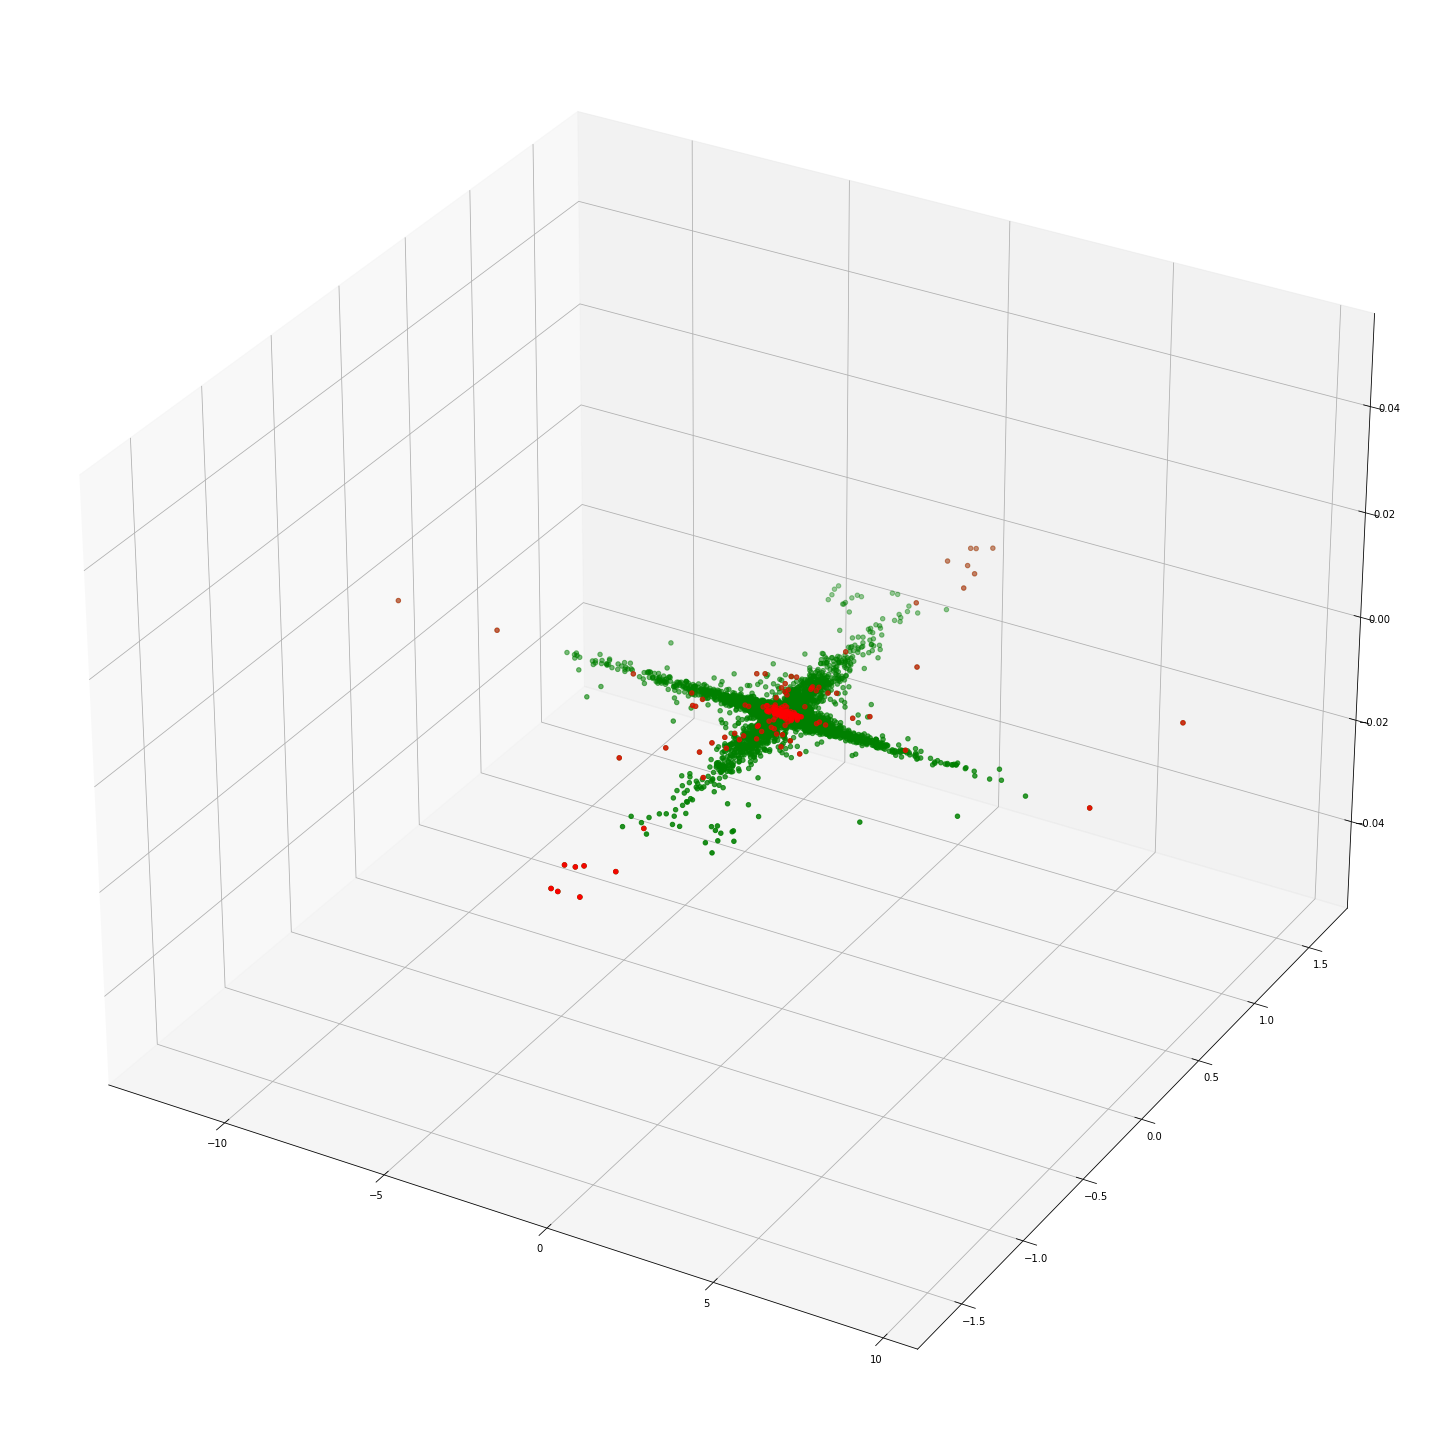

In [18]:
fig = plt.figure(figsize=(20,20))
ax = Axes3D(fig)

ax.scatter(data.iloc[:,0], data.iloc[:,1], color = 'green')
ax.scatter(data.iloc[outlier_index,0],data.iloc[outlier_index,1], color='red')


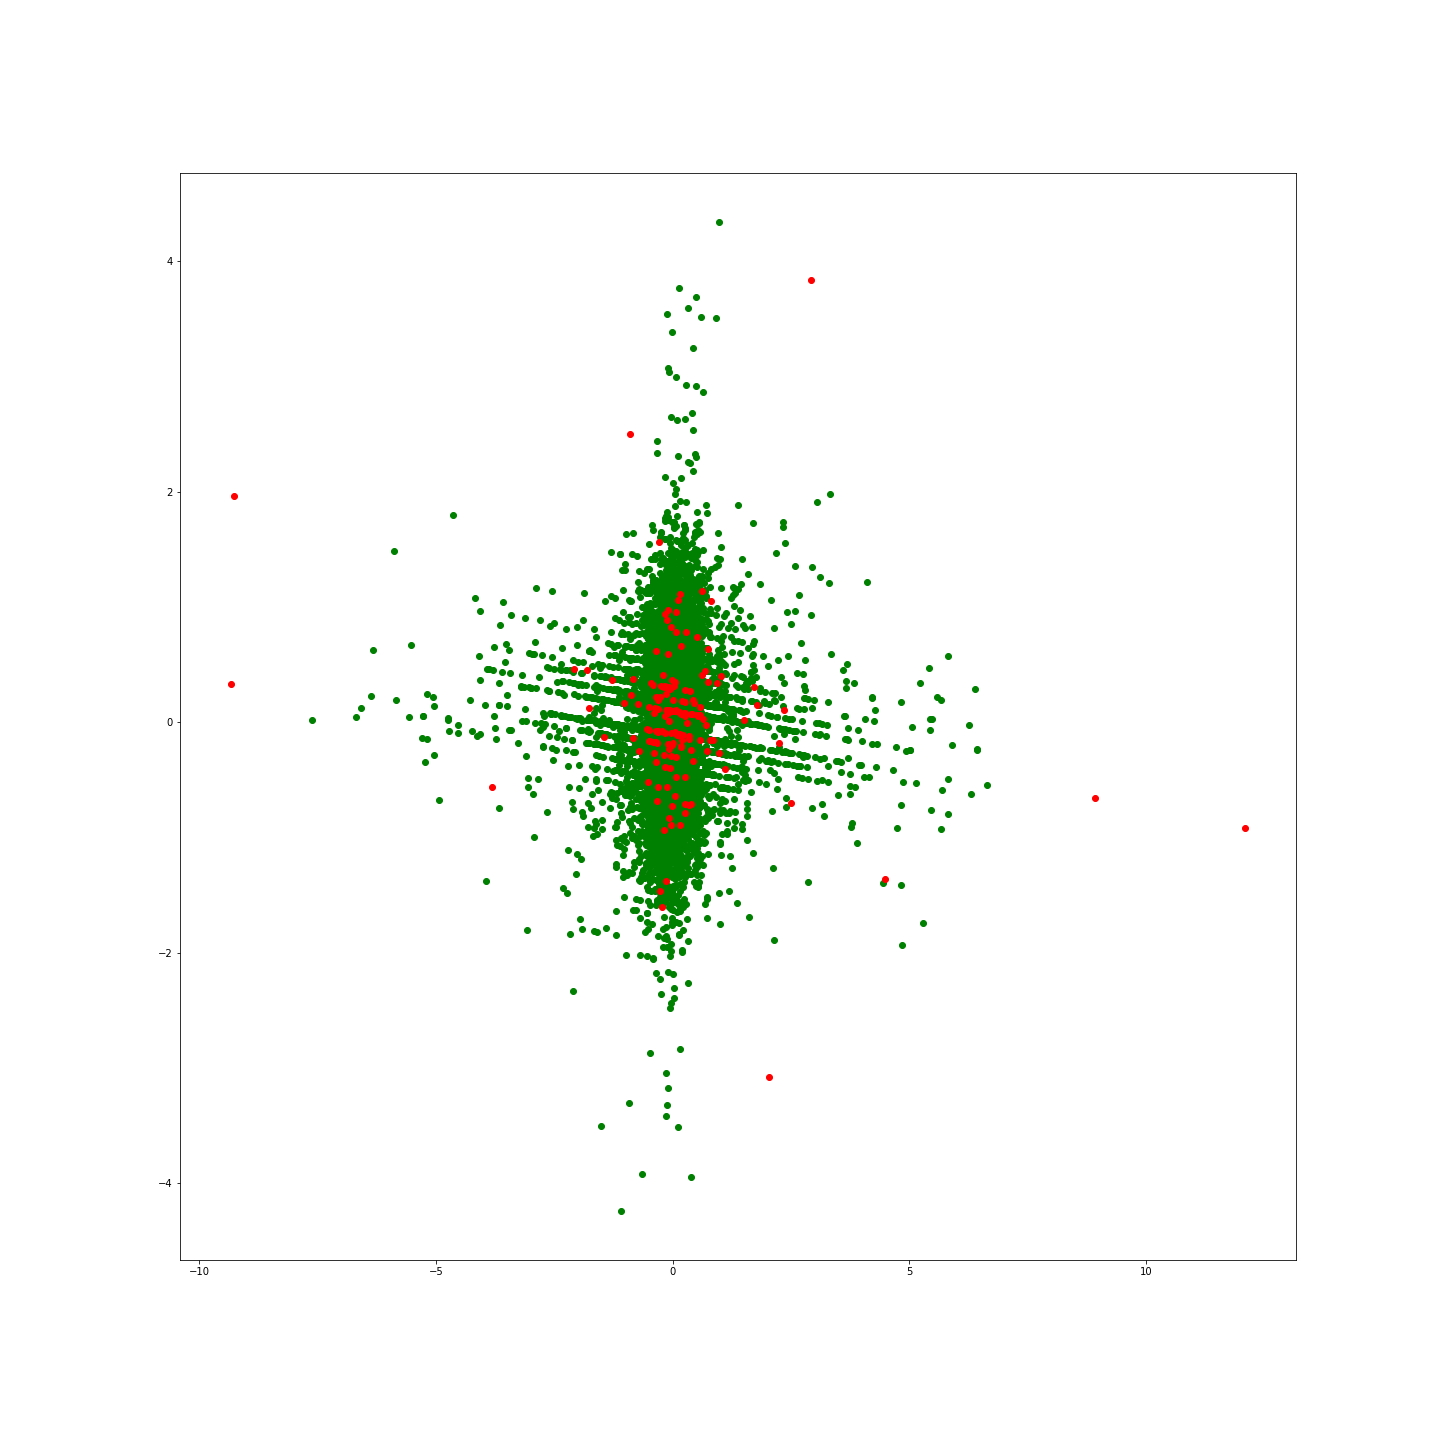

In [19]:
fig = plt.figure(figsize=(20,20))

non_outlier = np.delete(data_reduced, outlier_index, 0)
plt.scatter(non_outlier[:,0], non_outlier[:,1],color = 'green')
plt.scatter(data_reduced[outlier_index,0],data_reduced[outlier_index,1],color='red')